In [14]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np

# Ruta
BASE = Path.cwd().parent
PATH_CSV = BASE / "DB_Model" / "df_modelo.csv"
PATH_SUM = BASE / "Resumen_de_variables_del_modelo__depurado_.csv" 

# Lectura
df = pd.read_csv(PATH_CSV, engine="python", sep=None)

# Resumen
print(f"Filas: {len(df):,} | Columnas: {len(df.columns)}")
print("Columnas:")
print(list(df.columns))

display(df.head(10))

Filas: 72,292 | Columnas: 44
Columnas:
['\ufeffLlave2', 'Nombre_linea', 'Fecha_aprobacion', 'Antiguedad_meses', 'Nombre_fondo', 'Valor_financiacion', 'Cuotas', 'Tipo_interes', 'Vr_neto_matricula', 'Y_categorica', 'IDBANNER', 'FECHA_NACIMIENTO', 'ESTADO_CIVIL', 'GENERO', 'FACULTAD', 'PROGRAMA', 'NIVEL', 'ESTADO', 'TIPOESTUDIANTE', 'SEDE', 'SELLO', 'CARGA', 'GRUPO_ETNICO', 'TIPO_DISCAPACIDAD', 'NACIONALIDAD', 'Mora', 'Valor_cuota_inicial', 'Valor_primera_cuota', 'fecha de pago', 'Validación valor financiado', 'Detalle estado final', 'Tipo_estudiante', 'Operación', 'Cate', 'Subcate', 'Cohorte', 'Mes', 'Cliente', 'Media Score', 'AñoB', 'VALOR MAXIMO', 'VALOR MEDIO', 'VALOR BAJO', 'Plataforma']


,﻿Llave2,Nombre_linea,Fecha_aprobacion,Antiguedad_meses,Nombre_fondo,Valor_financiacion,Cuotas,Tipo_interes,Vr_neto_matricula,Y_categorica,...,Subcate,Cohorte,Mes,Cliente,Media Score,AñoB,VALOR MAXIMO,VALOR MEDIO,VALOR BAJO,Plataforma
0,100046415_202110_13110,ESTUDIA YA-TECH GLOBAL,12/02/2021,56,BOGOTA,1895042,12,Cap. Fijo-Int. vencido,2190800.0,Bajo,...,Tiene Sello Financiero (Aprobado Directo),Cohorte 1,Febrero,Estudiante,Scoring = o > 721,2021.0,0.0,0.0,0.0,ROMBO V1
1,100094861_202131_13118,ESTUDIA YA-TECH GLOBAL,15/02/2021,56,CONVENIO SENA NACIONAL,1312400,4,Cap. Fijo-Int. vencido,1544000.0,Bajo,...,Tiene Sello Financiero (Aprobado Directo),Cohorte 1,Febrero,Estudiante,Scoring = o > 721,2021.0,0.0,0.0,0.0,ROMBO V1
2,100090085_202141_13292,ESTUDIA YA-TECH GLOBAL LINEA BLANCA,5/02/2021,56,CONVENIO INESUR,2589525,4,Cap. Fijo-Int. vencido,3385000.0,Bajo,...,Tiene Sello Financiero (Lista Blanca),Cohorte 1,Febrero,Estudiante,Scoring = o > 401 y < o = 480,2021.0,0.0,0.0,0.0,ROMBO V1
3,100082960_202131_13165,ESTUDIA YA-TECH GLOBAL,25/02/2021,56,CONVENIO CONSTRUYENDO FUTURO - CONSFUTUR S.A.S,1307300,6,Cap. Fijo-Int. vencido,1538000.0,Bajo,...,Tiene Sello Financiero (Aprobado Directo),Cohorte 1,Febrero,Estudiante,Scoring = o > 561 y < o = 639,2021.0,0.0,0.0,0.0,ROMBO V1
4,100083999_202110_13175,ESTUDIA YA-TECH GLOBAL,15/02/2021,56,BOGOTA,2186720,6,Cap. Fijo-Int. vencido,2528000.0,Bajo,...,Tiene Sello Financiero (Aprobado Directo),Cohorte 1,Febrero,Estudiante,Scoring = o > 561 y < o = 639,2021.0,0.0,0.0,0.0,ROMBO V1
5,100039484_202151_13183,ESTUDIA YA-TECH GLOBAL,15/02/2021,56,BOGOTA,2906250,12,Cap. Fijo-Int. vencido,3419250.0,Bajo,...,Tiene Sello Financiero (Aprobado Directo),Cohorte 1,Febrero,Estudiante,Scoring = o > 721,2021.0,0.0,0.0,0.0,ROMBO V1
6,100095400_202131_13154,ESTUDIA YA-TECH GLOBAL,15/02/2021,56,BOGOTA,1147457,6,Cap. Fijo-Int. vencido,1421000.0,Bajo,...,Aprobado (Aprobado Directo),Cohorte 1,Febrero,Estudiante,Scoring = o > 640 y < o = 720,2021.0,0.0,0.0,0.0,ROMBO V1
7,100074911_202141_13275,ESTUDIA YA-TECH GLOBAL,15/02/2021,56,BOGOTA,1242300,4,Cap. Fijo-Int. vencido,1462300.0,Bajo,...,Tiene Sello Financiero (Aprobado Directo),Cohorte 1,Febrero,Estudiante,Scoring = o > 640 y < o = 720,2021.0,0.0,0.0,0.0,ROMBO V1
8,100077506_202151_13347,ESTUDIA YA-TECH GLOBAL,5/02/2021,56,CONVENIO FUNDACIÓN YANAPAX,3245960,12,Cap. Fijo-Int. vencido,3819960.0,Bajo,...,Tiene Sello Financiero (Aprobado Directo),Cohorte 1,Febrero,Estudiante,Scoring = o > 640 y < o = 720,2021.0,0.0,0.0,0.0,ROMBO V1
9,100070822_202151_13369,ESTUDIA YA-TECH GLOBAL LINEA BLANCA,5/02/2021,56,CONVENIO FUNDACIÓN YANAPAX,3476500,4,Cap. Fijo-Int. vencido,4090000.0,Bajo,...,Tiene Sello Financiero (Lista Blanca),Cohorte 1,Febrero,Estudiante,Scoring = o > 640 y < o = 720,2021.0,0.0,0.0,0.0,ROMBO V1


In [15]:
# Normaliza encabezados 
df = df.copy()
df.columns = (
    df.columns.astype(str)
      .str.replace('\ufeff', '', regex=False)  
      .str.strip()                             
)

# 1) Separar Y y X
TARGET = "Y_categorica"
DROP = ["Llave2", "Nombre_linea", "IDBANNER"]
y = df[TARGET].copy()
X = df.drop([TARGET] + [c for c in DROP if c in df.columns], axis=1).copy()

# 2) Columnas numéricas / categóricas
num_cols = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]
cat_cols = [c for c in X.columns if c not in num_cols]

# 3) Preprocesamiento 
num_tf = SimpleImputer(strategy="median")
cat_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(
        handle_unknown="ignore",
        sparse_output=True,          
        min_frequency=0.01,       
        dtype=np.float32         
    ))
])
preprocess = ColumnTransformer(
    transformers=[
        ("num", num_tf, num_cols),
        ("cat", cat_tf, cat_cols),
    ],
    remainder="drop",
    sparse_threshold=1.0  
)

# 4) Partición
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Validación del preprocesador
_ = preprocess.fit(X_train, y_train)

print("X:", X.shape, "| y:", y.shape)
print("Numéricas:", len(num_cols), "| Categóricas:", len(cat_cols))
print("Train:", X_train.shape, "Test:", X_test.shape)

X: (72292, 40) | y: (72292,)
Numéricas: 10 | Categóricas: 30
Train: (57833, 40) Test: (14459, 40)


In [16]:
# BORUTA + competencia RF vs XGB vs LGBM 

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from boruta import BorutaPy

import numpy as np
import pandas as pd


le = LabelEncoder().fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc  = le.transform(y_test)
n_clases = len(le.classes_)

# 1) Columnas
num_cols = [c for c in X_train.columns if pd.api.types.is_numeric_dtype(X_train[c])]
cat_cols = [c for c in X_train.columns if c not in num_cols]

# 2) Prepro base 
prep = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), num_cols),
        ("cat", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("ord", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
        ]), cat_cols),
    ],
    remainder="drop"
)

# 3) Ajustar preprocesamiento y ejecutar BORUTA sobre X_train transformado
Xtr_prep = prep.fit_transform(X_train)  # numpy array
rf_for_boruta = RandomForestClassifier(
    n_estimators=300, max_depth=7, class_weight="balanced",
    n_jobs=-1, random_state=42
)
boruta = BorutaPy(estimator=rf_for_boruta, n_estimators='auto', verbose=0, random_state=42)
boruta.fit(Xtr_prep, y_train_enc)

mask = boruta.support_            
print(f"BORUTA seleccionó {mask.sum()} de {mask.size} features.")

# Transformador para aplicar el mismo subset de columnas tras el prepro
sel = FunctionTransformer(lambda X: X[:, mask], accept_sparse=True)

# 4) Modelos 
rf = RandomForestClassifier(
    bootstrap=True, max_depth=14, max_features=0.5,
    min_samples_leaf=5, n_estimators=457,
    n_jobs=-1, random_state=42, class_weight="balanced"
)

xgb = XGBClassifier(
    objective="multi:softprob", eval_metric="mlogloss", tree_method="hist",
    colsample_bytree=float(0.8887995089067299), gamma=float(0.4692763545078751),
    learning_rate=float(0.02014017785138258), max_depth=7, min_child_weight=5,
    n_estimators=360, subsample=float(0.7216968971838151),
    n_jobs=-1, random_state=42
)

lgb = LGBMClassifier(
    objective="multiclass", num_class=n_clases, metric="multi_logloss",
    colsample_bytree=float(0.798070764044508), learning_rate=float(0.02618993380073931),
    max_depth=3, min_child_samples=45, n_estimators=861, num_leaves=54,
    reg_alpha=float(0.37768070515882624), reg_lambda=float(0.21257793724562235),
    subsample=float(0.6831766651472755),
    n_jobs=-1, random_state=42
)

pipelines = {
    "BORUTA+RF":  Pipeline([("prep", prep), ("sel", sel), ("clf", rf)]),
    "BORUTA+XGB": Pipeline([("prep", prep), ("sel", sel), ("clf", xgb)]),
    "BORUTA+LGBM":Pipeline([("prep", prep), ("sel", sel), ("clf", lgb)]),
}

# 5) Competencia
resultados = []
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for nombre, pipe in pipelines.items():
    cv_auc = cross_val_score(pipe, X_train, y_train_enc, scoring="roc_auc_ovr", cv=cv, n_jobs=-1).mean()

    # Entrenar y evaluar en test
    pipe.fit(X_train, y_train_enc)
    proba_test = pipe.predict_proba(X_test)
    test_auc   = roc_auc_score(y_test_enc, proba_test, multi_class="ovr", average="macro")
    y_pred_enc = pipe.predict(X_test)
    y_pred     = le.inverse_transform(y_pred_enc)

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro", zero_division=0)
    rec  = recall_score(y_test, y_pred, average="macro", zero_division=0)

    print(f"\n{nombre}")
    print(f"CV AUC (OVR):   {cv_auc:0.4f}")
    print(f"Test AUC (OVR): {test_auc:0.4f}")
    print(f"Accuracy: {acc:0.4f} | Precision(macro): {prec:0.4f} | Recall(macro): {rec:0.4f}")

    resultados.append({
        "modelo": nombre,
        "cv_auc_ovr": cv_auc,
        "test_auc_ovr": test_auc,
        "accuracy": acc,
        "precision_macro": prec,
        "recall_macro": rec,
        "pipe": pipe
    })

# 6) Seleccionar el mejor por Test AUC (OVR)
res_df = pd.DataFrame(resultados).sort_values("test_auc_ovr", ascending=False)
best_name = res_df.iloc[0]["modelo"]
best_model = res_df.iloc[0]["pipe"]

print("\nMejor modelo por Test AUC (OVR):", best_name)


BORUTA seleccionó 15 de 40 features.

BORUTA+RF
CV AUC (OVR):   0.7935
Test AUC (OVR): 0.8101
Accuracy: 0.7511 | Precision(macro): 0.4260 | Recall(macro): 0.5840

BORUTA+XGB
CV AUC (OVR):   0.8171
Test AUC (OVR): 0.8336
Accuracy: 0.8917 | Precision(macro): 0.4880 | Recall(macro): 0.3383
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002977 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1761
[LightGBM] [Info] Number of data points in the train set: 57833, number of used features: 15
[LightGBM] [Info] Start training from score -2.283794
[LightGBM] [Info] Start training from score -0.115066
[LightGBM] [Info] Start training from score -4.991505
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

c:\Users\Juanr\anaconda3_\envs\mi_entorno\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Juanr\anaconda3_\envs\mi_entorno\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



BORUTA+LGBM
CV AUC (OVR):   0.8127
Test AUC (OVR): 0.8288
Accuracy: 0.8897 | Precision(macro): 0.4324 | Recall(macro): 0.3424

Mejor modelo por Test AUC (OVR): BORUTA+XGB


In [ ]:
#Mejor modelo: BORUTA+XGB
#BORUTA seleccionó 15 de 41 features
#CV AUC (OVR):   0.8086
#Test AUC (OVR): 0.8214
#Accuracy: 0.8904 | Precision(macro): 0.5657 | Recall(macro): 0.3538


In [17]:
#Exportar predicciones y unirlas a la base original 

from pathlib import Path
import pandas as pd
import numpy as np

BASE = Path.cwd().parent
OUT_TEST = BASE / "DB_Model" / f"df_con_predicciones_TEST_{best_name.replace('+','_')}.csv"
OUT_FULL = BASE / "DB_Model" / f"df_con_predicciones_FULL_{best_name.replace('+','_')}.csv"

# Probabilidades y clases 
proba  = best_model.predict_proba(X_test)                 
clases_cod = best_model.named_steps["clf"].classes_   
clases_nom = le.inverse_transform(clases_cod)      
y_hat = le.inverse_transform(best_model.predict(X_test))   

# DataFrame de predicciones 
preds = pd.DataFrame(index=X_test.index)
preds["y_true"] = y_test.values
preds["y_pred"] = y_hat
for i, cls_name in enumerate(clases_nom):
    preds[f"proba_{str(cls_name)}"] = proba[:, i].astype(np.float32)

# 1) SOLO filas de test con TODAS las columnas originales + predicciones
df_test_con_preds = df.loc[X_test.index].join(preds)
df_test_con_preds.to_csv(OUT_TEST, index=True)
print(f"Guardado TEST: {OUT_TEST}")
print(df_test_con_preds.head(5))

# 2) BASE COMPLETA con predicciones
df_full_con_preds = df.join(preds, how="left")
df_full_con_preds.to_csv(OUT_FULL, index=True)
print(f"Guardado FULL: {OUT_FULL}")


Guardado TEST: c:\Users\Juanr\Downloads\Prediccion_Morosidad_Estudiantil_\Prediccion_Morosidad_Estudiantil\DB_Model\df_con_predicciones_TEST_BORUTA_XGB.csv
                       Llave2                           Nombre_linea  \
13618  100105637_202120_15481                 ESTUDIA YA-TECH GLOBAL   
11456  100124843_202243_20266  ESTUDIA YA-TECH GLOBAL PROMO NAVIDEÑA   
416    100113510_202304_25761             ESTUDIA YA-TECH GLOBAL 1.8   
51557  100222334_202553_82758               LINEA CRÉDITO CUOTA FIJO   
16315  100157683_202320_34444             ESTUDIA YA-TECH GLOBAL 1.8   

      Fecha_aprobacion  Antiguedad_meses Nombre_fondo  Valor_financiacion  \
13618       30/08/2021                50       BOGOTA             1979650   
11456       15/06/2022                40       BOGOTA             2689543   
416         30/11/2022                35       BOGOTA             1275000   
51557       20/07/2025                 3       BOGOTA             4023050   
16315       20/07/2023    

Top de variables seleccionadas por BORUTA
                        feature  importance
0                  Tipo_interes    0.243954
1              Antiguedad_meses    0.158883
2                        Cuotas    0.092511
3                TIPOESTUDIANTE    0.079981
4              Fecha_aprobacion    0.049948
5                       Cohorte    0.042172
6                           Mes    0.041521
7                          AñoB    0.041077
8                         CARGA    0.040176
9   Validación valor financiado    0.037183
10          Valor_primera_cuota    0.037160
11          Valor_cuota_inicial    0.035785
12                     PROGRAMA    0.033820
13            Vr_neto_matricula    0.033548
14           Valor_financiacion    0.032281


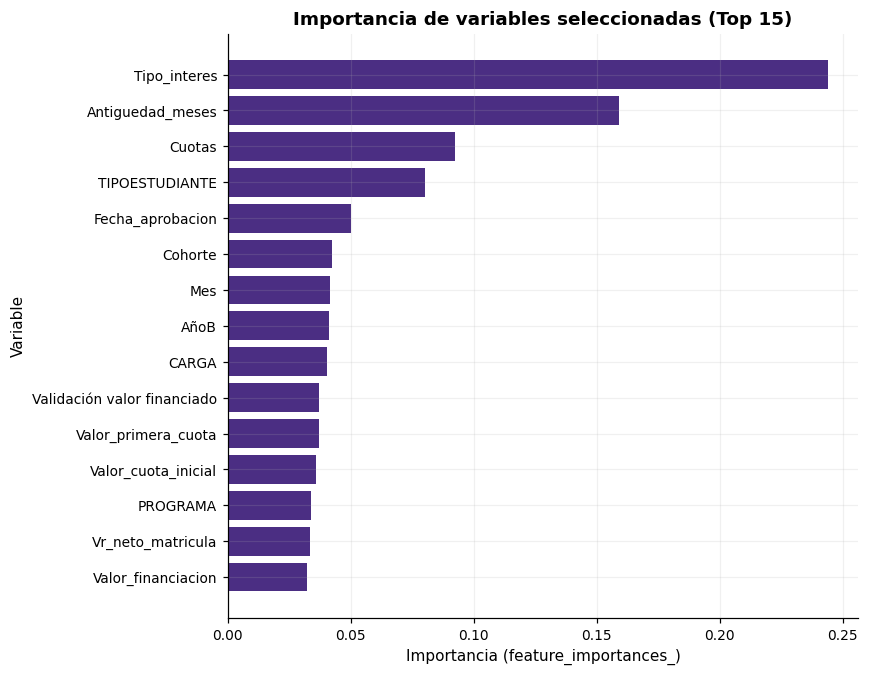

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

# Estilo 
def set_viz():
    plt.rcParams.update({
        "figure.dpi": 110,
        "axes.spines.top": False, "axes.spines.right": False,
        "axes.grid": True, "grid.alpha": 0.18,
        "axes.titleweight": "bold", "axes.titlesize": 12,
        "axes.labelsize": 10, "xtick.labelsize": 9, "ytick.labelsize": 9,
        "legend.frameon": False, "legend.fontsize": 9,
    })
    plt.rcParams["axes.prop_cycle"] = cycler(color=[
        "#4B2E83","#005BBB","#7F56D9","#1F7A8C","#E67E22","#2D3748","#3BA99C"
    ])
set_viz()

ingreso_palette = {1:"#E6E6FA",2:"#C8B6FF",3:"#A78BFA",4:"#7C3AED",5:"#5B21B6",6:"#4338CA",7:"#1E3A8A"}


feat_names_after_prep = list(num_cols) + list(cat_cols)


selected_mask = mask
selected_names = [feat_names_after_prep[i] for i, m in enumerate(selected_mask) if m]

# Importancias del clasificador 
clf = best_model.named_steps["clf"]
if not hasattr(clf, "feature_importances_"):
    raise AttributeError("El clasificador seleccionado no expone 'feature_importances_'. Usa un modelo tree-based.")

imp = clf.feature_importances_  

# Tabla
imp_df = pd.DataFrame({
    "feature": selected_names,
    "importance": imp
}).sort_values("importance", ascending=False).reset_index(drop=True)

print("Top de variables seleccionadas por BORUTA")
print(imp_df.head(20))

# Gráfico de barras horizontal 
TOP_N = min(30, len(imp_df))
fig, ax = plt.subplots(figsize=(8, 0.35*TOP_N + 1))
plot_df = imp_df.iloc[:TOP_N].iloc[::-1]  
ax.barh(plot_df["feature"], plot_df["importance"])
ax.set_title(f"Importancia de variables seleccionadas (Top {TOP_N})")
ax.set_xlabel("Importancia (feature_importances_)")
ax.set_ylabel("Variable")
plt.tight_layout()
plt.show()


C:\Users\Juanr\AppData\Local\Temp\ipykernel_9336\1019747419.py:44: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  out[c] = (dt.view("int64") // 10**9 // 86400).astype("Int64")
C:\Users\Juanr\AppData\Local\Temp\ipykernel_9336\1019747419.py:44: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  out[c] = (dt.view("int64") // 10**9 // 86400).astype("Int64")


Top 25 correlaciones (|corr|) con Y_alto:
                                            feature  corr_Yalto  abs_corr
0                             num__Fecha_aprobacion    0.114702  0.114702
1                             num__Antiguedad_meses   -0.114270  0.114270
2               cat__Tipo_interes_Anualidad Vencida    0.111708  0.111708
3          cat__Tipo_interes_Cap. Fijo-Int. vencido   -0.111708  0.111708
4                         cat__CARGA_0 A 999999,999    0.109968  0.109968
5                                         num__AñoB    0.099750  0.099750
6                          cat__Plataforma_ROMBO V2    0.074848  0.074848
7                          cat__Plataforma_ROMBO V1   -0.074848  0.074848
8                        cat__Cliente_No Estudiante    0.074783  0.074783
9                                    cat__Mes_Julio    0.074745  0.074745
10                           cat__Cohorte_Cohorte 4    0.068056  0.068056
11            cat__Operación_Servicio al Estudiante   -0.066894  0.066

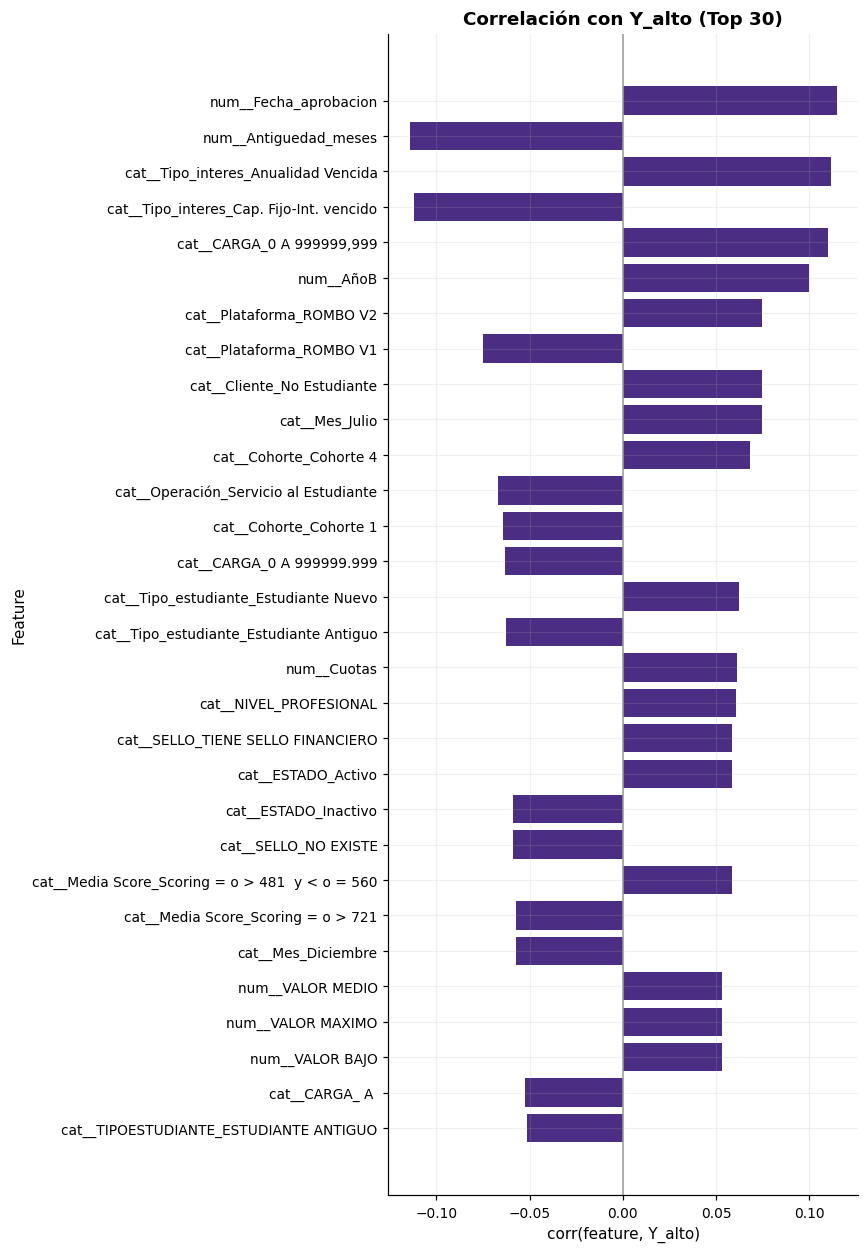

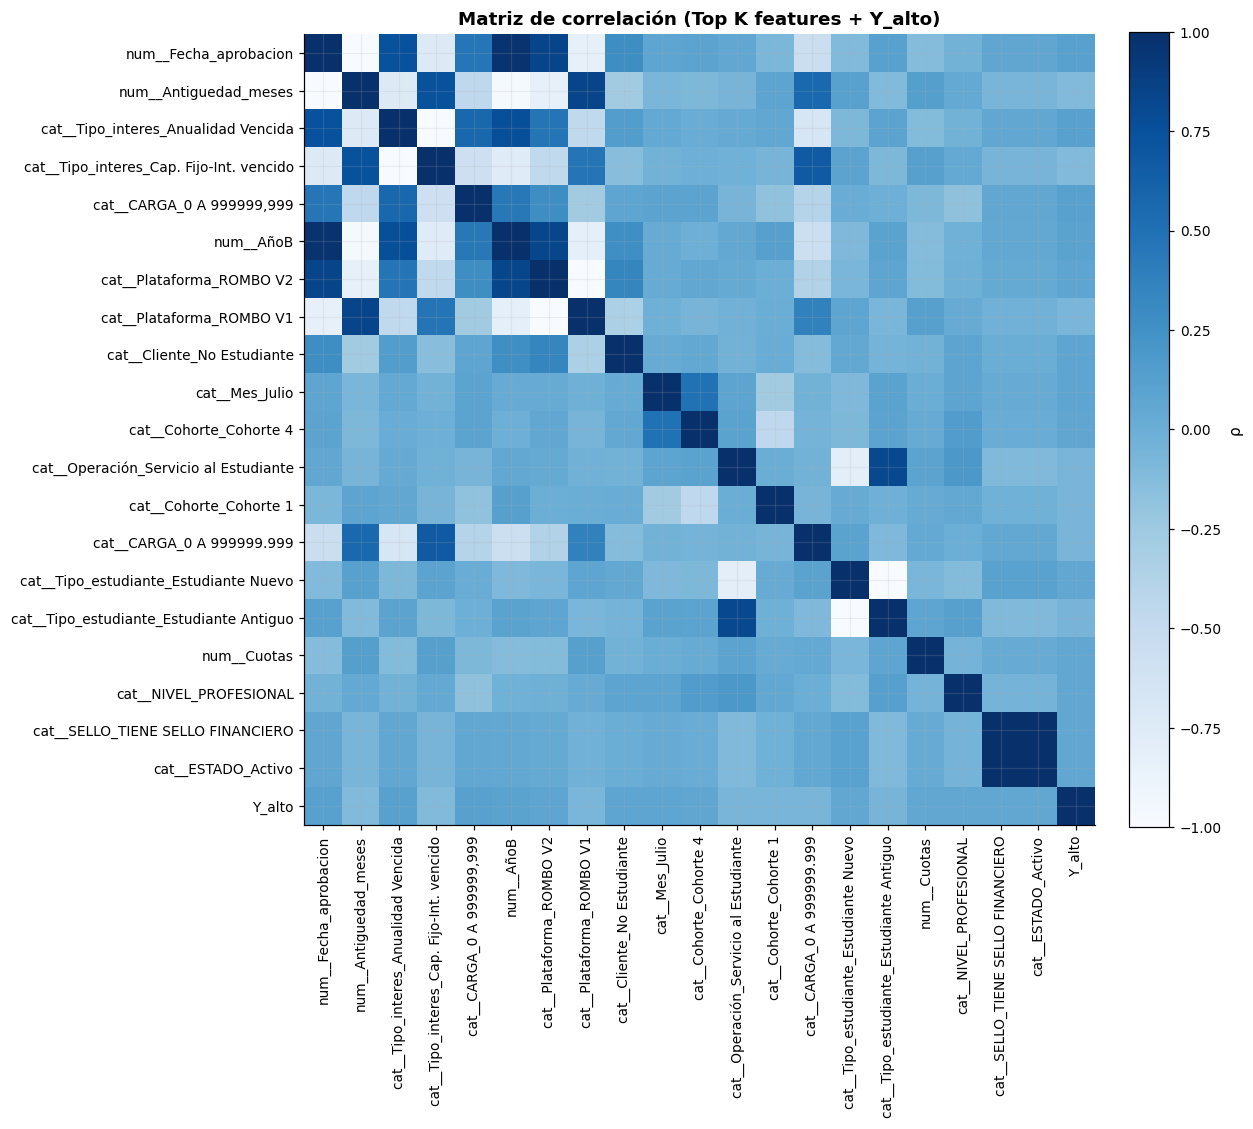

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from scipy import sparse
import warnings

# Estilo 
def set_viz():
    plt.rcParams.update({
        "figure.dpi": 110,
        "axes.spines.top": False, "axes.spines.right": False,
        "axes.grid": True, "grid.alpha": 0.18,
        "axes.titleweight": "bold", "axes.titlesize": 12,
        "axes.labelsize": 10, "xtick.labelsize": 9, "ytick.labelsize": 9,
        "legend.frameon": False, "legend.fontsize": 9,
    })
    plt.rcParams["axes.prop_cycle"] = cycler(color=[
        "#4B2E83","#005BBB","#7F56D9","#1F7A8C","#E67E22","#2D3748","#3BA99C"
    ])
set_viz()

y_alto = (y_train.astype(str).str.strip().str.lower() == "alto").astype(np.float32).to_numpy()
n = y_alto.shape[0]
y_mean = y_alto.mean()
y_center = y_alto - y_mean
y_std = y_center.std(ddof=1)
if y_std == 0:
    raise ValueError("Y_alto es constante; no se puede correlacionar.")

Xc = X_train.copy()
def try_parse_dates_to_ordinal(df):
    out = df.copy()
    for c in df.columns:
        if pd.api.types.is_object_dtype(df[c]) or pd.api.types.is_string_dtype(df[c]):
            name_l = str(c).lower()
            if any(k in name_l for k in ["fech", "date", "aprob", "pago"]):
                dt = pd.to_datetime(df[c], errors="coerce", dayfirst=True)
                if dt.notna().mean() > 0.7:
                    out[c] = (dt.view("int64") // 10**9 // 86400).astype("Int64")
    return out
Xc = try_parse_dates_to_ordinal(Xc)

num_cols_all = [c for c in Xc.columns if pd.api.types.is_numeric_dtype(Xc[c])]
cat_cols_all = [c for c in Xc.columns if c not in num_cols_all]

ohe_kwargs = {
    "handle_unknown": "ignore",
    "dtype": np.float32,
}
try:
    OneHotEncoder(min_frequency=0.01) 
    ohe_kwargs["min_frequency"] = 0.01
except TypeError:
    pass

try:
    ohe = OneHotEncoder(sparse_output=True, **ohe_kwargs)
except TypeError:
    ohe = OneHotEncoder(sparse=True, **ohe_kwargs)

pre = ColumnTransformer(
    [
        ("num", SimpleImputer(strategy="median"), num_cols_all),
        ("cat", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("ohe", ohe),
        ]), cat_cols_all),
    ],
    remainder="drop",
    sparse_threshold=1.0
)

Xt = pre.fit_transform(Xc)
if not sparse.isspmatrix(Xt):
    Xt = sparse.csr_matrix(Xt)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    try:
        feat_names = pre.get_feature_names_out().tolist()
    except Exception:
        feat_names = []
        feat_names += num_cols_all
        try:
            ohe_names = pre.named_transformers_["cat"].named_steps["ohe"].get_feature_names_out(cat_cols_all).tolist()
        except Exception:
            ohe_names = [f"{c}_OHE_{i}" for i in range(Xt.shape[1] - len(num_cols_all))]
        feat_names += ohe_names

feat_names = feat_names[:Xt.shape[1]]

x_sum  = np.array(Xt.sum(axis=0)).ravel()
x2_sum = np.array(Xt.power(2).sum(axis=0)).ravel()
x_mean = x_sum / n

xy_center_sum = np.array(Xt.T.dot(y_center)).ravel()
cov_xy = (xy_center_sum - (x_mean * y_center.sum())) / (n - 1)

var_x = (x2_sum - n * (x_mean ** 2)) / (n - 1)
std_x = np.sqrt(np.maximum(var_x, 1e-12))

corr = cov_xy / (std_x * y_std)

corr_df = pd.DataFrame({
    "feature": feat_names,
    "corr_Yalto": corr,
    "abs_corr": np.abs(corr)
}).sort_values("abs_corr", ascending=False).reset_index(drop=True)

print("Top 25 correlaciones (|corr|) con Y_alto:")
print(corr_df.head(25))

TOP_N = min(30, len(corr_df))
plot_df = corr_df.iloc[:TOP_N].iloc[::-1]
fig, ax = plt.subplots(figsize=(8, 0.35*TOP_N + 1))
ax.barh(plot_df["feature"], plot_df["corr_Yalto"])
ax.axvline(0, color="#999999", linewidth=1)
ax.set_title(f"Correlación con Y_alto (Top {TOP_N})")
ax.set_xlabel("corr(feature, Y_alto)")
ax.set_ylabel("Feature")
plt.tight_layout()
plt.show()

TOP_K = min(20, len(corr_df))
top_feats = corr_df.iloc[:TOP_K]["feature"].tolist()

feat_to_idx = {f:i for i, f in enumerate(feat_names)}
cols_idx = [feat_to_idx[f] for f in top_feats]

Xt_top = Xt[:, cols_idx].toarray()
M = np.column_stack([Xt_top, y_alto])
cols_names = top_feats + ["Y_alto"]
C = np.corrcoef(M, rowvar=False)

fig, ax = plt.subplots(figsize=(1 + 0.5*(TOP_K+1), 1 + 0.5*(TOP_K+1)))
im = ax.imshow(C, cmap="Blues", vmin=-1, vmax=1)
ax.set_title("Matriz de correlación (Top K features + Y_alto)")
ax.set_xticks(np.arange(len(cols_names))); ax.set_yticks(np.arange(len(cols_names)))
ax.set_xticklabels(cols_names, rotation=90); ax.set_yticklabels(cols_names)
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label="ρ")
plt.tight_layout()
plt.show()


C:\Users\Juanr\AppData\Local\Temp\ipykernel_9336\647201775.py:41: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  out[c] = (dt.view("int64") // 10**9 // 86400).astype("Int64")
C:\Users\Juanr\AppData\Local\Temp\ipykernel_9336\647201775.py:41: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  out[c] = (dt.view("int64") // 10**9 // 86400).astype("Int64")



Top 25 variables (resumidas por variable original) con mayor |corr(Y_alto)|:
            variable tipo                                    nice_label  \
0   Fecha_aprobacion  num                              Fecha_aprobacion   
1   Antiguedad_meses  num                              Antiguedad_meses   
2               Tipo  cat              Tipo = interes_Anualidad Vencida   
3              CARGA  cat                        CARGA = 0 A 999999,999   
4               AñoB  num                                          AñoB   
5         Plataforma  cat                         Plataforma = ROMBO V2   
6            Cliente  cat                       Cliente = No Estudiante   
7                Mes  cat                                   Mes = Julio   
8            Cohorte  cat                           Cohorte = Cohorte 4   
9          Operación  cat            Operación = Servicio al Estudiante   
10            Cuotas  num                                        Cuotas   
11             NIVEL  

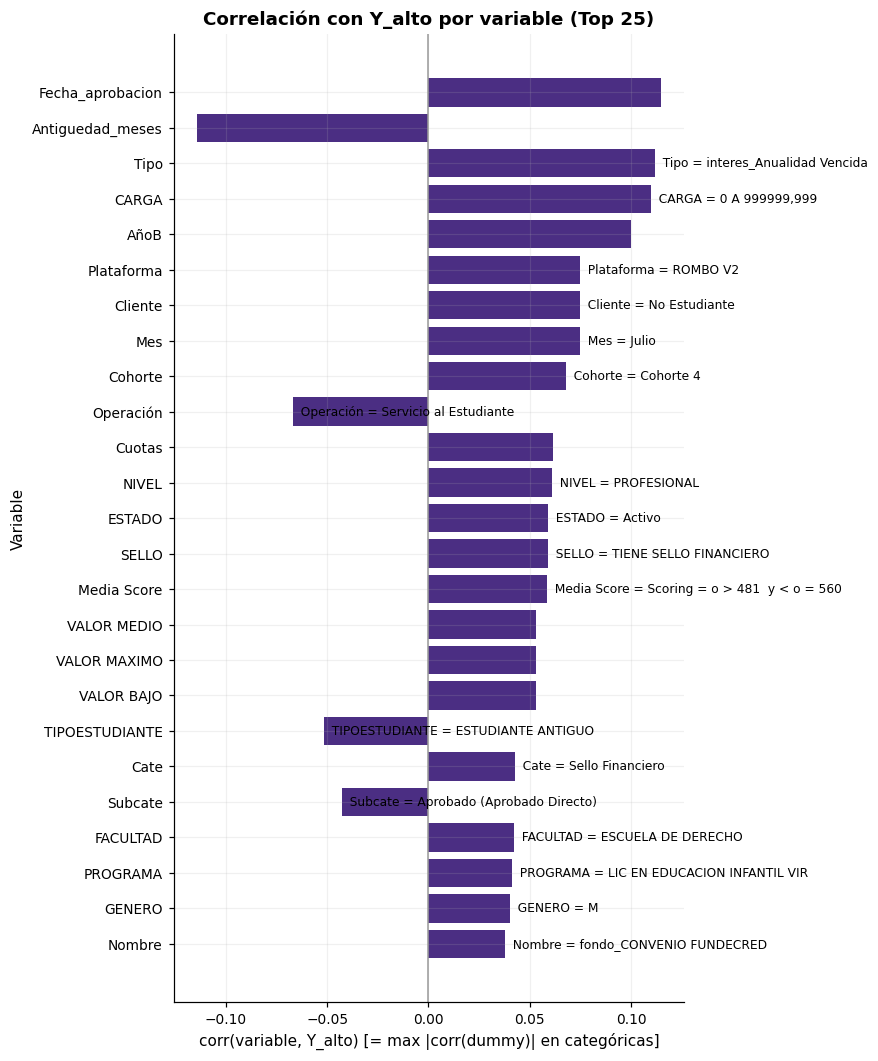

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from scipy import sparse

def set_viz():
    plt.rcParams.update({
        "figure.dpi": 110,
        "axes.spines.top": False, "axes.spines.right": False,
        "axes.grid": True, "grid.alpha": 0.18,
        "axes.titleweight": "bold", "axes.titlesize": 12,
        "axes.labelsize": 10, "xtick.labelsize": 9, "ytick.labelsize": 9,
        "legend.frameon": False, "legend.fontsize": 9,
    })
    plt.rcParams["axes.prop_cycle"] = cycler(color=[
        "#4B2E83","#005BBB","#7F56D9","#1F7A8C","#E67E22","#2D3748","#3BA99C"
    ])
set_viz()

y_alto = (y_train.astype(str).str.strip().str.lower() == "alto").astype(np.float32).to_numpy()
n = y_alto.shape[0]
y_center = y_alto - y_alto.mean()
y_std = y_center.std(ddof=1)
if y_std == 0:
    raise ValueError("Y_alto es constante; no se puede correlacionar.")

Xc = X_train.copy()
def try_parse_dates_to_ordinal(df):
    out = df.copy()
    for c in df.columns:
        if pd.api.types.is_object_dtype(df[c]) or pd.api.types.is_string_dtype(df[c]):
            name_l = str(c).lower()
            if any(k in name_l for k in ["fech", "date", "aprob", "pago"]):
                dt = pd.to_datetime(df[c], errors="coerce", dayfirst=True)
                if dt.notna().mean() > 0.7:
                    out[c] = (dt.view("int64") // 10**9 // 86400).astype("Int64")
    return out
Xc = try_parse_dates_to_ordinal(Xc)

num_cols_all = [c for c in Xc.columns if pd.api.types.is_numeric_dtype(Xc[c])]
cat_cols_all = [c for c in Xc.columns if c not in num_cols_all]

ohe_kwargs = {"handle_unknown": "ignore", "dtype": np.float32}
try:
    OneHotEncoder(min_frequency=0.01)  
    ohe_kwargs["min_frequency"] = 0.01
except TypeError:
    pass

try:
    ohe = OneHotEncoder(sparse_output=True, **ohe_kwargs)
except TypeError:
    ohe = OneHotEncoder(sparse=True, **ohe_kwargs)

pre = ColumnTransformer(
    [
        ("num", SimpleImputer(strategy="median"), num_cols_all),
        ("cat", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("ohe", ohe),
        ]), cat_cols_all),
    ],
    remainder="drop",
    sparse_threshold=1.0
)

Xt = pre.fit_transform(Xc)
if not sparse.isspmatrix(Xt):
    Xt = sparse.csr_matrix(Xt)

x_sum  = np.array(Xt.sum(axis=0)).ravel()
x2_sum = np.array(Xt.power(2).sum(axis=0)).ravel()
x_mean = x_sum / n
xy_center_sum = np.array(Xt.T.dot(y_center)).ravel()
cov_xy = (xy_center_sum - (x_mean * y_center.sum())) / (n - 1)
var_x = (x2_sum - n * (x_mean ** 2)) / (n - 1)
std_x = np.sqrt(np.maximum(var_x, 1e-12))
corr = cov_xy / (std_x * y_std) 

try:
    feat_names = pre.get_feature_names_out().tolist()
except Exception:
    feat_names = num_cols_all[:]
    try:
        ohe_names = pre.named_transformers_["cat"].named_steps["ohe"].get_feature_names_out(cat_cols_all).tolist()
    except Exception:
        ohe_names = [f"{c}_OHE_{i}" for c in cat_cols_all for i in range(1)]
    feat_names += ohe_names
feat_names = feat_names[:Xt.shape[1]]

variables = []
etiquetas  = []
tipos      = []
for f in feat_names:
    if "__" in f:
        pref, rest = f.split("__", 1)    
        if pref == "num":
            variables.append(rest)      
            etiquetas.append(rest)
            tipos.append("num")
        else:
            if "_" in rest:
                col, cat = rest.split("_", 1)
                variables.append(col)
                etiquetas.append(f"{col} = {cat}")
            else:
                variables.append(rest)
                etiquetas.append(rest)
            tipos.append("cat")
    else:
        base = f
        if f in num_cols_all:
            tipos.append("num")
            etiquetas.append(base)
        else:
            tipos.append("cat")
            if "_" in f:
                col, cat = f.split("_", 1)
                etiquetas.append(f"{col} = {cat}")
                base = col
            else:
                etiquetas.append(base)
        variables.append(base)

corr_df = pd.DataFrame({
    "feature": feat_names,
    "variable": variables,
    "nice_label": etiquetas,
    "tipo": tipos,
    "corr": corr
})
corr_df["abs_corr"] = corr_df["corr"].abs()

summary = (
    corr_df.sort_values("abs_corr", ascending=False)
           .groupby("variable", as_index=False)
           .first()  
           .sort_values("abs_corr", ascending=False)
           .reset_index(drop=True)
)

print("\nTop 25 variables (resumidas por variable original) con mayor |corr(Y_alto)|:")
print(summary.loc[:24, ["variable","tipo","nice_label","corr","abs_corr"]])

TOP_N = min(25, len(summary))
plot_df = summary.iloc[:TOP_N].iloc[::-1]

fig, ax = plt.subplots(figsize=(8, 0.35*TOP_N + 1))
ax.barh(plot_df["variable"], plot_df["corr"])
ax.axvline(0, color="#999999", linewidth=1)
ax.set_title(f"Correlación con Y_alto por variable (Top {TOP_N})")
ax.set_xlabel("corr(variable, Y_alto) [= max |corr(dummy)| en categóricas]")
ax.set_ylabel("Variable")

for y_i, r in enumerate(plot_df.itertuples(index=False)):
    if r.tipo == "cat":
        ax.text(r.corr, y_i, f"  {r.nice_label}", va="center", fontsize=8)

plt.tight_layout()
plt.show()


C:\Users\Juanr\AppData\Local\Temp\ipykernel_9336\2536893646.py:47: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  data[c] = (dt.view("int64") // 10**9 // 86400).astype("float64")
C:\Users\Juanr\AppData\Local\Temp\ipykernel_9336\2536893646.py:47: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  data[c] = (dt.view("int64") // 10**9 // 86400).astype("float64")
C:\Users\Juanr\AppData\Local\Temp\ipykernel_9336\2536893646.py:45: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(data[c], errors="coerce", dayfirst=True)


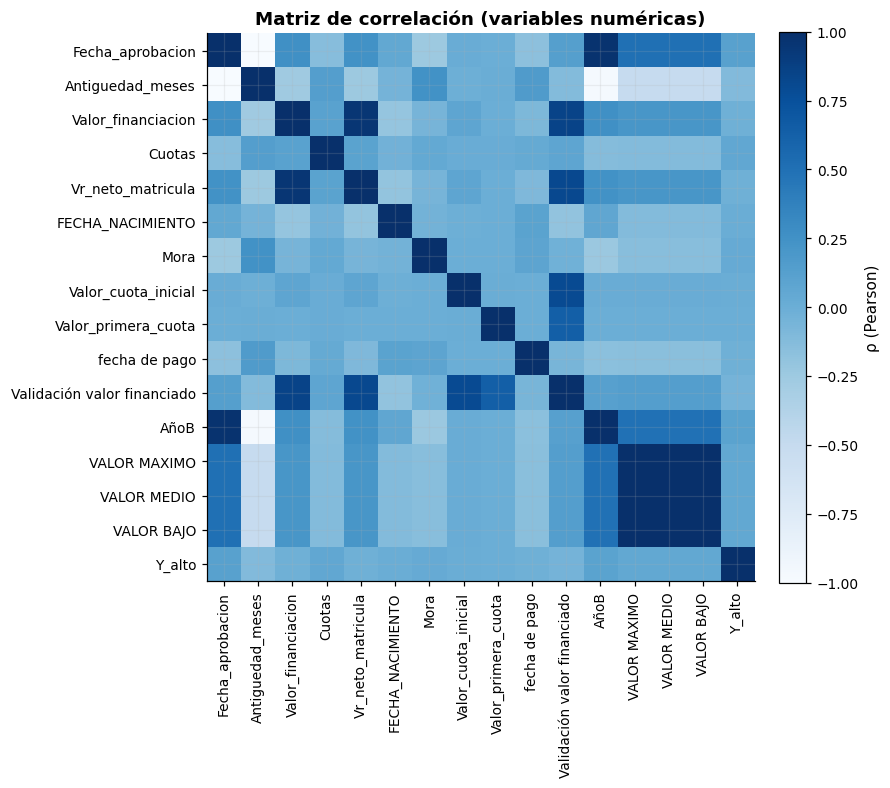

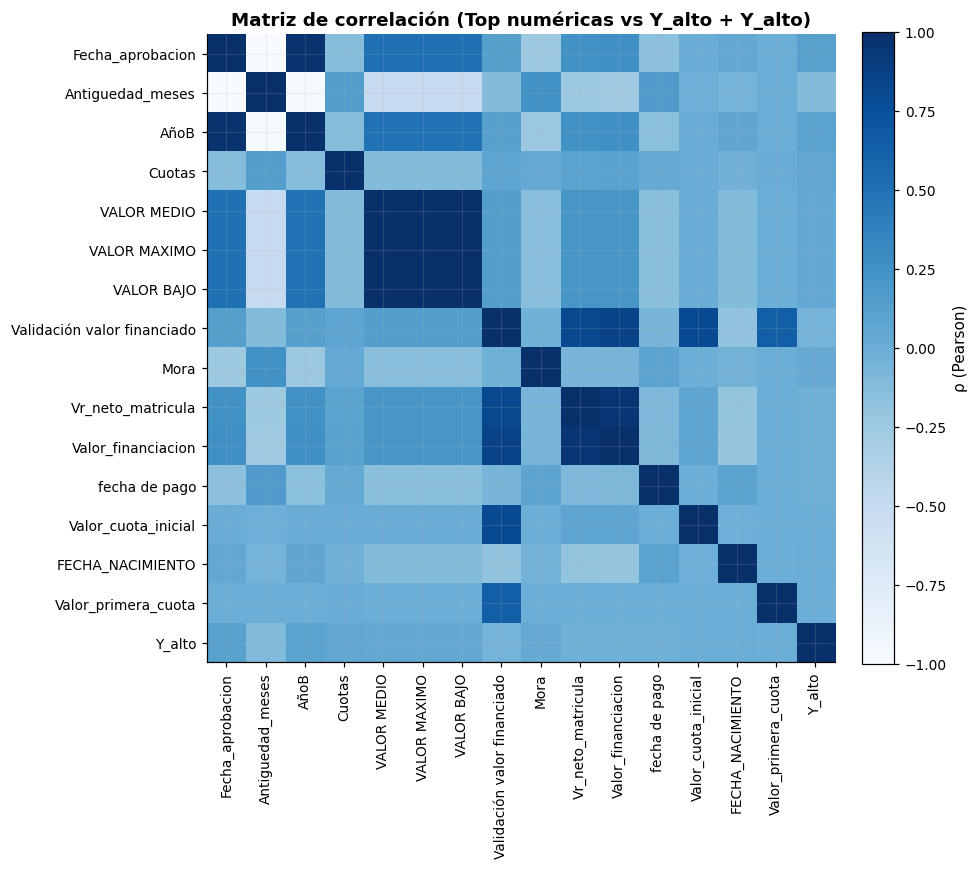

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

def set_viz():
    plt.rcParams.update({
        "figure.dpi": 110,
        "axes.spines.top": False, "axes.spines.right": False,
        "axes.grid": True, "grid.alpha": 0.18,
        "axes.titleweight": "bold", "axes.titlesize": 12,
        "axes.labelsize": 10, "xtick.labelsize": 9, "ytick.labelsize": 9,
        "legend.frameon": False, "legend.fontsize": 9,
    })
    plt.rcParams["axes.prop_cycle"] = cycler(color=[
        "#4B2E83","#005BBB","#7F56D9","#1F7A8C","#2D3748","#3BA99C","#E67E22"
    ])
set_viz()

data = df.copy()

if "Y_alto" not in data.columns:
    if "Y_categorica" in data.columns:
        data["Y_alto"] = (data["Y_categorica"].astype(str).str.strip().str.lower() == "alto").astype(float)
    else:
        data["Y_alto"] = np.nan

def to_number_series(s: pd.Series) -> pd.Series:
    s2 = pd.to_numeric(s, errors="coerce")
    if s2.notna().mean() >= 0.6:
        return s2
    t = s.astype(str).str.strip()
    comma_more = t.str.count(",").sum() > t.str.count(r"\.").sum()
    if comma_more:
        t = t.str.replace(".", "", regex=False).str.replace(",", ".", regex=False)
    else:
        t = t.str.replace(",", "", regex=False)
    s3 = pd.to_numeric(t, errors="coerce")
    return s3

for c in data.columns:
    if data[c].dtype == "object":
        name = str(c).lower()
        if any(k in name for k in ["fech", "date", "aprob", "pago", "nac"]):
            dt = pd.to_datetime(data[c], errors="coerce", dayfirst=True)
            if dt.notna().mean() >= 0.6:
                data[c] = (dt.view("int64") // 10**9 // 86400).astype("float64")

for c in data.columns:
    if data[c].dtype == "object":
        conv = to_number_series(data[c])
        if conv.notna().mean() >= 0.6:
            data[c] = conv

num_cols = [c for c in data.columns if pd.api.types.is_numeric_dtype(data[c])]
num_cols = [c for c in num_cols if str(c).strip().lower() not in ("idbanner", "llave2")]
num_cols = [c for c in num_cols if data[c].std(skipna=True) > 0]

if len(num_cols) < 2:
    print("No hay suficientes columnas numéricas con variabilidad para armar una MATRIZ de correlación.")
else:
    MAX_COLS = 40
    if len(num_cols) > MAX_COLS:
        var_order = (data[num_cols].var(skipna=True)
                     .sort_values(ascending=False)
                     .head(MAX_COLS)
                     .index.tolist())
        cols_mat = var_order
        print(f"(Info) Había {len(num_cols)} columnas numéricas; se muestran las {MAX_COLS} de mayor varianza.")
    else:
        cols_mat = num_cols

    corr_full = data[cols_mat].corr(method="pearson")

    fig, ax = plt.subplots(figsize=(1 + 0.45*len(cols_mat), 1 + 0.45*len(cols_mat)))
    im = ax.imshow(corr_full.values, cmap="Blues", vmin=-1, vmax=1)
    ax.set_title("Matriz de correlación (variables numéricas)")
    ax.set_xticks(np.arange(len(cols_mat))); ax.set_yticks(np.arange(len(cols_mat)))
    ax.set_xticklabels(cols_mat, rotation=90)
    ax.set_yticklabels(cols_mat)
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("ρ (Pearson)")
    plt.tight_layout()
    plt.show()

    if "Y_alto" in data.columns and data["Y_alto"].notna().any():
        corrs = []
        for c in num_cols:
            if c == "Y_alto":
                continue
            pair = pd.concat([data[c], data["Y_alto"]], axis=1).dropna()
            if pair.shape[0] >= 2 and pair[c].std() > 0:
                r = pair[c].corr(pair["Y_alto"], method="pearson")
                corrs.append((c, float(abs(r))))
        if corrs:
            corr_rank = pd.DataFrame(corrs, columns=["var", "abs_corr"]).sort_values("abs_corr", ascending=False)
            TOP_K = min(20, len(corr_rank))
            foc_cols = corr_rank.head(TOP_K)["var"].tolist()
            cols_focus = foc_cols + ["Y_alto"]
            corr_focus = data[cols_focus].corr(method="pearson")

            fig, ax = plt.subplots(figsize=(1 + 0.5*len(cols_focus), 1 + 0.5*len(cols_focus)))
            im = ax.imshow(corr_focus.values, cmap="Blues", vmin=-1, vmax=1)
            ax.set_title("Matriz de correlación (Top numéricas vs Y_alto + Y_alto)")
            ax.set_xticks(np.arange(len(cols_focus))); ax.set_yticks(np.arange(len(cols_focus)))
            ax.set_xticklabels(cols_focus, rotation=90); ax.set_yticklabels(cols_focus)
            cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
            cbar.set_label("ρ (Pearson)")
            plt.tight_layout()
            plt.show()
        else:
            print("No se pudieron calcular correlaciones con Y_alto (quizás todas son constantes o con demasiados NaNs).")


In [31]:
import pandas as pd
from pathlib import Path

data = [
    # Modelo,          AUC_test,  AUC_CV,  Accuracy, Precision_macro, Recall_macro, Metodología
    ("RF",              0.8226,    0.8082,  0.8603,   0.4675,          0.4722,      "Random Forest (tuned)"),
    ("XGBoost",         0.8478,    0.8357,  0.8909,   0.4533,          0.3402,      "XGB (tuned)"),
    ("LightGBM",        0.8413,    0.8282,  0.8910,   0.4620,          0.3402,      "LGBM (tuned)"),
    ("PSA + XGB",       0.8287,    0.8139,  0.8920,   0.8240,          0.3435,      "PCA/PSA + XGB"),
    ("BORUTA + XGB",    0.8336,    0.8171,  0.8917,   0.4880,          0.3383,      "Boruta + XGB"),
]

df = pd.DataFrame(data, columns=[
    "Modelo","AUC_test","AUC_CV","Accuracy","Precision_macro","Recall_macro","Metodología"
])
df["Δ AUC (Test−CV)"] = (df["AUC_test"] - df["AUC_CV"]).round(4)

def fmt(x): 
    return f"{x:.2f}"

pretty = (
    df[["Modelo","Metodología","AUC_test","AUC_CV","Δ AUC (Test−CV)","Accuracy","Precision_macro","Recall_macro"]]
      .style
      .format({
          "AUC_test": fmt, "AUC_CV": fmt, "Δ AUC (Test−CV)": fmt,
          "Accuracy": fmt, "Precision_macro": fmt, "Recall_macro": fmt
      })
      .hide(axis="index")
      .set_table_styles([
          {"selector":"th","props":[("background-color","#0F1E3A"),("color","white"),("font-weight","bold"),("text-align","center")]},
          {"selector":"td","props":[("border","1px solid #E5E7EB"),("padding","6px 10px")]},
          {"selector":"table","props":[("border-collapse","collapse"),("font-family","Inter, Arial, sans-serif"),("font-size","12px")]}
      ])
      .set_properties(**{"text-align":"center"})
      .set_properties(subset=["Modelo","Metodología"], **{"text-align":"left"})
      .highlight_max(subset=["AUC_test"], color="#D1E9FF")
      .highlight_max(subset=["Recall_macro"], color="#EDE9FE")
)

pretty


Modelo,Metodología,AUC_test,AUC_CV,Δ AUC (Test−CV),Accuracy,Precision_macro,Recall_macro
RF,Random Forest (tuned),0.82,0.81,0.01,0.86,0.47,0.47
XGBoost,XGB (tuned),0.85,0.84,0.01,0.89,0.45,0.34
LightGBM,LGBM (tuned),0.84,0.83,0.01,0.89,0.46,0.34
PSA + XGB,PCA/PSA + XGB,0.83,0.81,0.01,0.89,0.82,0.34
BORUTA + XGB,Boruta + XGB,0.83,0.82,0.02,0.89,0.49,0.34


In [33]:
import dataframe_image as dfi
out_dir = Path.cwd() / "DB_Model"
out_dir.mkdir(exist_ok=True, parents=True)
(out_dir / "tabla_resultados_modelos.html").write_text(pretty.to_html())


4895

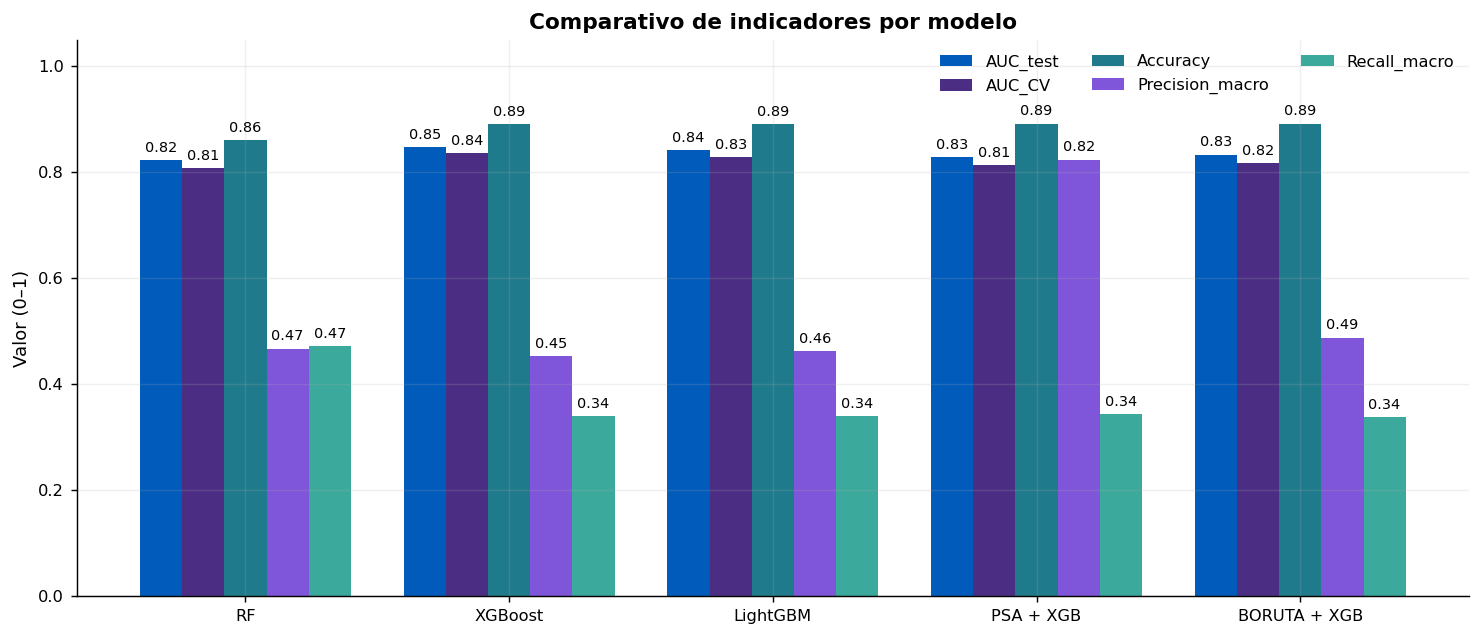

In [29]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.dpi": 130,
    "axes.spines.top": False, "axes.spines.right": False,
    "axes.grid": True, "grid.alpha": 0.18,
    "axes.titleweight": "bold", "axes.titlesize": 12,
    "axes.labelsize": 10, "xtick.labelsize": 9, "ytick.labelsize": 9,
    "legend.frameon": False, "legend.fontsize": 9,
})

def add_bar_labels(ax, bars, fmt="{:.2f}", dy=0.01, fontsize=8):
    for b in bars:
        h = b.get_height()
        ax.text(
            b.get_x() + b.get_width()/2, h + dy,
            fmt.format(h),
            ha="center", va="bottom", fontsize=fontsize
        )

indicadores = ["AUC_test", "AUC_CV", "Accuracy", "Precision_macro", "Recall_macro"]
x = np.arange(len(df))  
width = 0.16
offsets = np.linspace(-2, 2, num=len(indicadores)) * width
colors = ["#005BBB","#4B2E83","#1F7A8C","#7F56D9","#3BA99C"]

plt.figure(figsize=(11.5, 5))
for i, (ind, color) in enumerate(zip(indicadores, colors)):
    bars = plt.bar(x + offsets[i], df[ind].values, width=width, label=ind, color=color)
    add_bar_labels(plt.gca(), bars, fmt="{:.2f}", dy=0.01, fontsize=8)

plt.xticks(x, df["Modelo"], rotation=0)
plt.ylim(0, 1.05)
plt.ylabel("Valor (0–1)")
plt.title("Comparativo de indicadores por modelo")
plt.legend(ncol=3)
plt.grid(axis="y", alpha=0.2)
plt.tight_layout()

out_dir = Path.cwd() / "DB_Model"
out_dir.mkdir(exist_ok=True, parents=True)
plt.savefig(out_dir / "comparativo_indicadores_modelos.png", dpi=180)
plt.show()
